# Formula One Data Analysis

## Introduction

Formula One (F1) is a premier international auto racing series featuring high-performance single-seater cars. With its blend of cutting-edge technology, top-tier drivers, and iconic circuits, F1 captivates millions of fans worldwide. In this analysis, we delve into a comprehensive dataset sourced from Kaggle, providing insights into various aspects of the sport, including race results, driver performances, team strategies, and more.

## About the Dataset

The dataset used in this analysis is sourced from Kaggle, a popular platform for data science projects and competitions. It comprises a multiple csv collection of F1-related data, spanning multiple seasons, races, drivers, teams, and circuits. The dataset offers a treasure trove of information, including race outcomes, qualifying results, lap times, driver standings, and team performance metrics.

<a id="Load-the-Libraries"></a>
# 1. Load the Libraries

We will start the analysis by first importing the required libraries. We will import pandas for reading the data and manipulating it, matplotlib and seaborn for visualizing the data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. Read Data

Let's read the different csv files using the pandas read_csv function. The result are different dataframes names accordingly. We will then display the data just to get a preview of the different dataframes

In [2]:
# reading the data
circuits = pd.read_csv("data/circuits.csv")
constructors = pd.read_csv("data/constructors.csv")
drivers = pd.read_csv("data/drivers.csv")
races = pd.read_csv("data/races.csv")
results = pd.read_csv("data/results.csv")
status = pd.read_csv("data/status.csv")

In [3]:
#checking out the data
display('circuits', circuits.head(3), circuits.shape)
display('constructors', constructors.head(3), constructors.shape)
display('drivers', drivers.head(3), drivers.shape)
display('races', races.head(3), races.shape)
display('results', results.head(3), results.shape)
display('status', status.head(3), status.shape)

'circuits'

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.7380,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.5106,7,http://en.wikipedia.org/wiki/Bahrain_Internati...


(77, 9)

'constructors'

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


(211, 5)

'drivers'

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


(857, 9)

'races'

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


(1101, 18)

'results'

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1


(26080, 18)

'status'

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident


(139, 2)

# 3.  Data Preparation

For easy analysis we ideally need to be working with one dataset. We will proceed to merge the different dataframes using the common columns as seen prevoiusly. This will result to us having some columns we will not need for the analysis. We shall then drop those columns and then check the new dataframe using describe and info methods. We will also ensure there are no duplicate or missing data

In [4]:
#merging the data into one dataframe
df = pd.merge(results,races[['raceId','year','name','round']],on = 'raceId',how = 'left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']],on = 'driverId',how ='left')
df = pd.merge(df,constructors[['constructorId','name','nationality']],on ='constructorId',how ='left')

In [5]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [6]:
#Drop unnecessary columns
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','driverId','constructorId'],axis =1,inplace = True)

In [7]:
#rename the columns
df.rename(columns = {'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality',
                    'name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)
df.head()

,raceId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,18,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,18,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,18,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,18,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,18,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [8]:
df = df[['year','gp_name','round','driver','constructor_name','grid','raceId','positionOrder','points','time',
         'milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed',
        'driver_nationality','constructor_nationality']]
df.head()

,year,gp_name,round,driver,constructor_name,grid,raceId,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,18,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,18,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,18,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,18,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,18,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [9]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26080 entries, 0 to 26079
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     26080 non-null  int64  
 1   gp_name                  26080 non-null  object 
 2   round                    26080 non-null  int64  
 3   driver                   26080 non-null  object 
 4   constructor_name         26080 non-null  object 
 5   grid                     26080 non-null  int64  
 6   raceId                   26080 non-null  int64  
 7   positionOrder            26080 non-null  int64  
 8   points                   26080 non-null  float64
 9   time                     26080 non-null  object 
 10  milliseconds             26080 non-null  object 
 11  fastest_lap_rank         26080 non-null  object 
 12  fastestLapTime           26080 non-null  object 
 13  fastestLapSpeed          26080 non-null  object 
 14  driver_nationality    

In [10]:
df.describe()

,year,round,grid,raceId,positionOrder,points
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,1990.553144,8.368635,11.167561,536.695667,12.854141,1.906635
std,19.508665,4.949718,7.232797,303.034639,7.700068,4.219715
min,1950.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1976.000000,4.000000,5.000000,294.750000,6.000000,0.000000
50%,1991.000000,8.000000,11.000000,519.000000,12.000000,0.000000
75%,2007.000000,12.000000,17.000000,791.000000,18.000000,2.000000
max,2023.000000,22.000000,34.000000,1110.000000,39.000000,50.000000


In [11]:
#check for missing values
missing_values = df.isnull().sum()
print(missing_values)

year                       0
gp_name                    0
round                      0
driver                     0
constructor_name           0
grid                       0
raceId                     0
positionOrder              0
points                     0
time                       0
milliseconds               0
fastest_lap_rank           0
fastestLapTime             0
fastestLapSpeed            0
driver_nationality         0
constructor_nationality    0
dtype: int64


In [12]:
#check for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [year, gp_name, round, driver, constructor_name, grid, raceId, positionOrder, points, time, milliseconds, fastest_lap_rank, fastestLapTime, fastestLapSpeed, driver_nationality, constructor_nationality]
Index: []


In [13]:
df.reset_index(drop=True, inplace = True)
df['year'].value_counts()

1989    620
1990    542
1991    539
1988    495
2012    480
       ... 
1951    179
1969    177
1957    171
1966    166
1950    160
Name: year, Length: 74, dtype: int64

# 4.  Data Visualization

Now our data is ready for some EDA. Let's start with some visualizations. We will first check how the number of races per year has been changing since the year 1950. We will then check the composition of driver nationalities using a pie chart, then check for the top 10 most successful drivers and teams. We will also explore the correlation of grid position, final race position and the points scored in that race

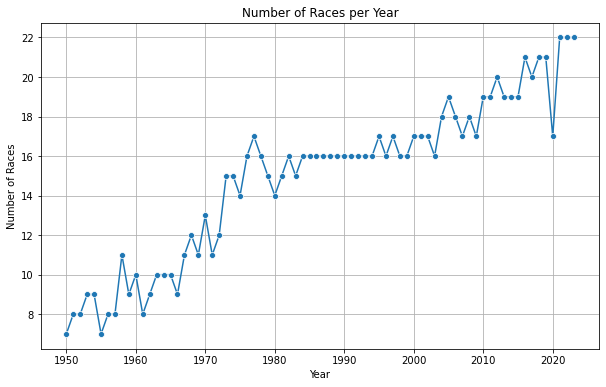

In [14]:
#Check how the number of races has changed over the years

yearly_race_counts=races.groupby('year')['raceId'].count().reset_index()
# Plotting the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_race_counts, x='year', y='raceId', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Number of Races per Year')
plt.grid(True)
plt.show()


As seen above the number of races has been marked with sharp changes. It has never been on a constant trajectory. It is marked with rise and falls. The sharpest decline in the number of races is seen in the year 2020 which is likely due to the COVID-19 Global pandemic.

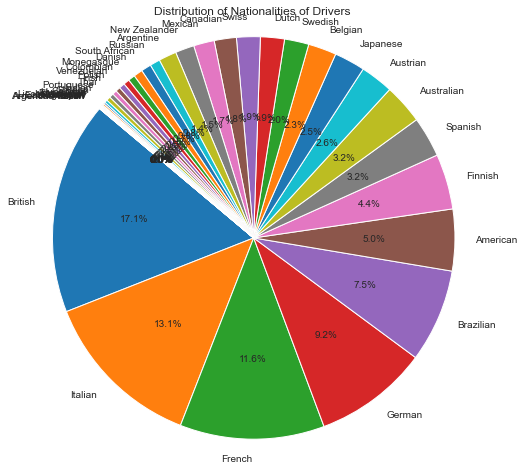

In [15]:
#check the driver nationality 

nationalities = df['driver_nationality'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")  # Set the style
sns.color_palette("pastel")  # Set color palette
plt.pie(nationalities, labels=nationalities.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nationalities of Drivers')
plt.axis('equal')

# Showing the plot
plt.show()

The pie chart displays the distribution of the different nationalities. With a quick look one can notice that British drivers form a large portion of the driver nationalities than any other nation. It can also be noted that most of the drivers are of European origin with a very small porrtion coming from elsewhere.

Next we will look at the drivers and try to know who are the most successful drivers in the history of formula 1.

Text(0.5, 0, 'Number of GP wins')

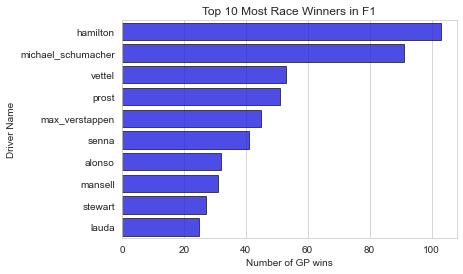

In [16]:
#check to see the top 10 drivers by the number of wins
driver_winner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

top10Drivers =driver_winner.head(10)
#barplot

sns.barplot(data=top10Drivers,y='driver',x='positionOrder',color='blue',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Top 10 Most Race Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

Lewis Hamilton is the most successfull driver in terms of the number of wins, followed closely by the legendary Michael Schumacher. The others follow with far less wins notably Vettel with just more than half of Hamilton's wins. Next we shall check on the teams. As with the bar chart below, it is visible that the team with most wins is <i>'the prancing horse'</i> Ferrari followed by the Mclaren, then the recently most dominant team Mercedes

Text(0.5, 0, 'Number of GP wins')

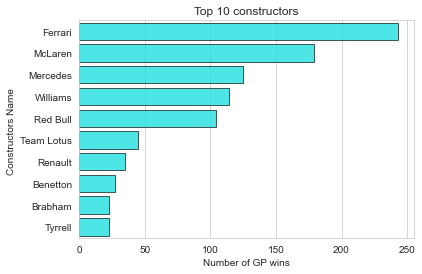

In [17]:
#now I would like to check the top 10 teams in the history of f1
constructor_winner =df.loc[df['positionOrder']== 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# top 10 GP constructors winners
top10constructors = constructor_winner.head(10)

sns.barplot (data = top10constructors, y = 'constructor_name', x = 'positionOrder',
         color = 'cyan', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( 'Top 10 constructors')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')

Now that we know who are the most successful team and driver, a question arises <i>What does it take to win in Formula 1?</i>Is it having the most talented driver? Is it having the fastest car?. We will try and answer the quaestion below.

First I opted to check the correlation of three columns: 'grid', 'positionOrder', 'points'

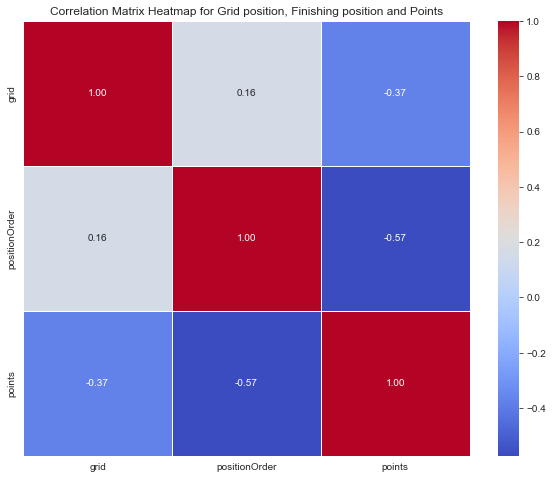

In [18]:

selected_columns = ['grid', 'positionOrder', 'points']

subset_df = df[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap for Grid position, Finishing position and Points')
plt.show()

Grid position and points are negatively correlated meaning the more you icrease the grid position like start from postion 10, the less likely for a driver to score points. A detailed anlaysis will be in the report

# 5. Lewis Hamilton

Now that we have done some general exporing of the data let's now take a case study of the most successful driver of all time <b>Sir Lewis Hamilton</b>. We will look at what's behind his wins. We will look at the number of races he has perticipated in, the percentage of wins, the number of pole positions held(qualifying) and try to look at the effect of his starting grid slot on his wins.

In [19]:
#now lets check on hamiltons wins

#first we check the number of races
lewis_df = df[df['driver'] == 'hamilton']
races = lewis_df.shape[0]
print(f'The number of race starts is {races}')


The number of race starts is 322


In [20]:
# of these races how many are race wins
lewis_wins = lewis_df[lewis_df['positionOrder'] == 1]
wins = lewis_wins.shape[0]
print(f'The number of race wins is {wins}')

The number of race wins is 103


In [21]:
#how many pole positions does he have in total
lewis_poles = lewis_df[lewis_df['grid'] == 1]
poles = lewis_poles.shape[0]
print(f'The number of pole positions is {poles}')

The number of pole positions is 104


In [22]:
#now lets check the percentage of wins from pole positions
win_pole = lewis_wins[lewis_wins['grid'] == 1]

print(f'The percentage races won from pole is {((win_pole.shape[0] / wins)*100):.2f}%')

The percentage races won from pole is 59.22%


In [23]:
#now lets check the percentage of wins from top three grid slots
top_three = lewis_wins[lewis_wins['grid'].isin([1,2,3]) ]

print(f'The percentage races won from pole is {((top_three.shape[0] / wins)*100):.2f}%')

The percentage races won from pole is 92.23%


In [24]:
#now lets check the percentage of wins from outside the top three grid slots
outside_top_three = lewis_wins[~lewis_wins['grid'].isin([1,2,3]) ]

print(f'The percentage races won from pole is {((outside_top_three.shape[0] / wins) * 100):.2f}%')

The percentage races won from pole is 7.77%


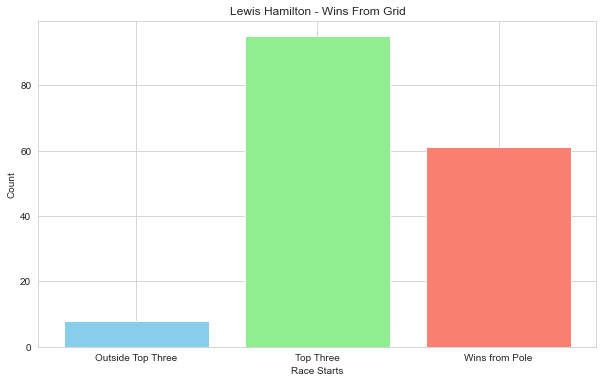

In [33]:
# Now we can visualize the resulst

# Count the number of occurrences for each category
counts = [outside_top_three.shape[0], top_three.shape[0], win_pole.shape[0]]

# Categories
categories = ['Outside Top Three', 'Top Three', 'Wins from Pole']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Lewis Hamilton - Wins From Grid')
plt.xlabel('Race Starts')
plt.ylabel('Count')
plt.show()


From the chart above, it can be noted that a great qualifying is part of his great record. With 104 pole positions, he is truly a master at qualifying. It is also noted that when he starts a race in the top three grid slots, he is more likely to win that race than when he is starting outside the top three.

But what's behind this great qualifying pace? Is it because of the car he is driving? Let's explore

It hs to be noted that he has only raced for two different teams Mclaren and Mercedes. We will need to isolate the time he was with these two teams to determine the competitiveness of the team when he was there

In [26]:
# check the number of constructor wins to check the car theory
#has he always had the better car?
sorted_lewis_df = lewis_df.sort_values(by='year', ascending=True)
sorted_lewis_df.head()

,year,gp_name,round,driver,constructor_name,grid,raceId,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
435,2007,Spanish Grand Prix,4,hamilton,McLaren,4,39,2,8.0,+6.790,5503020,2,1:22.876,202.205,British,British
413,2007,Bahrain Grand Prix,3,hamilton,McLaren,2,38,2,8.0,+2.360,5609875,2,1:34.270,206.674,British,British
457,2007,Monaco Grand Prix,5,hamilton,McLaren,2,40,2,8.0,+4.095,6033424,2,1:15.372,159.528,British,British
478,2007,Canadian Grand Prix,6,hamilton,McLaren,1,41,1,10.0,1:44:11.292,6251292,2,1:16.494,205.239,British,British
500,2007,United States Grand Prix,7,hamilton,McLaren,1,42,1,10.0,1:31:09.965,5469965,2,1:13.222,206.101,British,British


In [27]:
sorted_lewis_df.tail()

,year,gp_name,round,driver,constructor_name,grid,raceId,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
25881,2023,Australian Grand Prix,3,hamilton,Mercedes,3,1100,2,18.0,+0.179,9158550,5,1:20.613,235.703,British,German
25864,2023,Saudi Arabian Grand Prix,2,hamilton,Mercedes,7,1099,5,10.0,+31.065,4905959,6,1:32.941,239.145,British,German
26043,2023,Hungarian Grand Prix,11,hamilton,Mercedes,1,1109,4,12.0,+39.134,5927768,2,1:21.601,193.277,British,German
25925,2023,Miami Grand Prix,5,hamilton,Mercedes,13,1102,6,8.0,+51.249,5309490,4,1:30.669,214.882,British,German
26063,2023,Belgian Grand Prix,12,hamilton,Mercedes,3,1110,4,13.0,+49.671,5000121,1,1:47.305,234.978,British,German


In [28]:
#now lets look at which team won most races over this period
#for this we will need to know which teams he has races for
unique_teams = sorted_lewis_df['constructor_name'].unique()
print(unique_teams)

['McLaren' 'Mercedes']


In [29]:
#from the above we can see that he has raced for two teams 'McLaren' and 'Mercedes'
#we need to know the year he left maclaren for mercedes
mercedes_first_appearance_index = sorted_lewis_df[sorted_lewis_df['constructor_name'] == 'Mercedes'].index[0]

# Now you can get the full row where Mercedes first appears
mercedes_first_appearance_row = sorted_lewis_df.loc[mercedes_first_appearance_index]['year']
print(mercedes_first_appearance_row)

2013


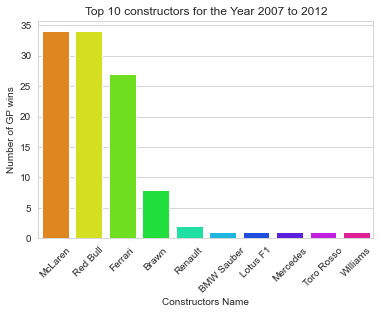

In [30]:
#lets separate the years at McLaren from those at Mercedes

df_2007_to_2012 = df[(df['year'] >= 2007) & (df['year'] <= 2012)]
df_2013_to_2023 = df[(df['year'] >= 2013) & (df['year'] <= 2023)]

#now that we have split the data we need to visualize the number of constructor
#wins by mclaren  in the respective period
constructor_winner =df_2007_to_2012.loc[df_2007_to_2012['positionOrder']== 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

top10constructors_2007_to_2012 = constructor_winner.head(10)

colors = sns.color_palette('hsv', n_colors=len(top10constructors_2007_to_2012))
sns.barplot(data=top10constructors_2007_to_2012, x='constructor_name', y='positionOrder',
            palette=colors)
plt.title('Top 10 constructors for the Year 2007 to 2012')
plt.xlabel('Constructors Name')
plt.ylabel('Number of GP wins')
plt.xticks(rotation=45)
plt.show()

Over the period he was with Mclaren, another team Red Bull was also challenging for wins. They roughly have the same number of wins. Though the McLaren team was competitive, his wins with the team cannot be soley attributed to the car performance.

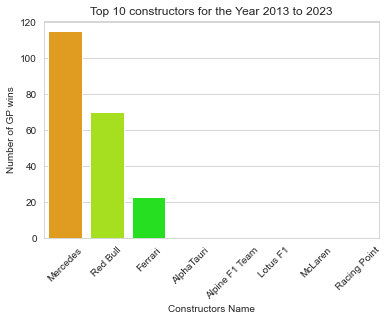

In [31]:
#wins by  mercedes in the respective period
constructor_winner =df_2013_to_2023.loc[df_2013_to_2023['positionOrder']== 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# pick the top 10 teams for the period
top10constructors_2013_to_2023 = constructor_winner.head(10)

# plot the data
colors = sns.color_palette('hsv', n_colors=len(top10constructors_2013_to_2023))

sns.barplot(data=top10constructors_2013_to_2023, x='constructor_name', y='positionOrder',
            palette=colors)
plt.title('Top 10 constructors for the Year 2013 to 2023')
plt.xlabel('Constructors Name')
plt.ylabel('Number of GP wins')
plt.xticks(rotation=45)
plt.show()

With Mercedes, the story is very different. The Mercedes cars have been very dominant. With nearly 120 wins, the team must have been making fast and reliable cars. With the nearly perfect car he must have been having it easy winning races.

# Conclusion

Formula one is a team sport. A team comes up with a car to challenge for championships every year. In the case of Lewis Hamilton I have determined that a fast qualifying car is very important. Qualifying high up on a Sartuday, offers you the best chance of emerging the winner on Sunday. It is not purely upto car performance as with his time in McLaren, Red Bull had nearly the same number of wins. 

It is my conclusion that the perfect driver-car pairing is the solution to win races in formula 1. A fast car and a talented driver is the ultimate dream.